In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Fraud Detection Transactions Dataset.csv')
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,14-08-2023 19:30,93213.17,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3,Amex,65,883.17,Biometric,0.8494,0.0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,07-06-2023 04:01,75725.25,Mobile,New York,Clothing,0.0,...,NaN,478.76,4,Mastercard,186,2203.36,Password,0.0959,0.0,1
2,TXN_199,USER_2734,28.96,Online,20-06-2023 15:25,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4,Visa,226,1909.29,Biometric,0.8400,0.0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,07-12-2023 00:31,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4,Visa,76,1311.86,OTP,0.7935,0.0,1
4,TXN_39489,USER_2014,31.28,POS,11-11-2023 23:44,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4,Mastercard,140,966.98,Password,0.3819,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,29-01-2023 18:38,76960.11,Mobile,Tokyo,Clothing,0.0,...,2.0,389.00,3,Amex,98,1537.54,PIN,0.1493,1.0,0
49996,TXN_44732,USER_1171,126.15,POS,09-05-2023 08:55,28791.75,Mobile,Tokyo,Clothing,0.0,...,13.0,434.95,4,Visa,93,2555.72,Biometric,0.3653,0.0,1
49997,TXN_38158,USER_2510,72.02,Online,30-01-2023 19:32,29916.41,Laptop,Mumbai,Clothing,0.0,...,1.0,369.15,2,Visa,114,4686.59,Biometric,0.5195,0.0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,09-03-2023 19:47,67895.67,Mobile,Tokyo,Electronics,0.0,...,13.0,242.29,4,Discover,72,4886.92,Biometric,0.7063,0.0,1


In [148]:
df.shape

(50000, 21)

In [149]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [150]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,14-08-2023 19:30,93213.17,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3,Amex,65,883.17,Biometric,0.8494,0.0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,07-06-2023 04:01,75725.25,Mobile,New York,Clothing,0.0,...,NaN,478.76,4,Mastercard,186,2203.36,Password,0.0959,0.0,1
2,TXN_199,USER_2734,28.96,Online,20-06-2023 15:25,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4,Visa,226,1909.29,Biometric,0.8400,0.0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,07-12-2023 00:31,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4,Visa,76,1311.86,OTP,0.7935,0.0,1
4,TXN_39489,USER_2014,31.28,POS,11-11-2023 23:44,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4,Mastercard,140,966.98,Password,0.3819,1.0,1


In [151]:
df.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
49995,TXN_11284,USER_4796,45.05,Online,29-01-2023 18:38,76960.11,Mobile,Tokyo,Clothing,0.0,...,2.0,389.00,3,Amex,98,1537.54,PIN,0.1493,1.0,0
49996,TXN_44732,USER_1171,126.15,POS,09-05-2023 08:55,28791.75,Mobile,Tokyo,Clothing,0.0,...,13.0,434.95,4,Visa,93,2555.72,Biometric,0.3653,0.0,1
49997,TXN_38158,USER_2510,72.02,Online,30-01-2023 19:32,29916.41,Laptop,Mumbai,Clothing,0.0,...,1.0,369.15,2,Visa,114,4686.59,Biometric,0.5195,0.0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,09-03-2023 19:47,67895.67,Mobile,Tokyo,Electronics,0.0,...,13.0,242.29,4,Discover,72,4886.92,Biometric,0.7063,0.0,1
49999,TXN_15795,USER_6529,13.00,Bank Transfer,19-08-2023 23:57,7668.82,Tablet,London,Restaurants,0.0,...,5.0,273.78,1,Mastercard,154,1568.95,OTP,0.8938,0.0,1


In [152]:
df.isnull().sum()

Transaction_ID                    0
User_ID                           0
Transaction_Amount                0
Transaction_Type                  0
Timestamp                         0
Account_Balance                   0
Device_Type                       0
Location                          0
Merchant_Category                 0
IP_Address_Flag                  73
Previous_Fraudulent_Activity     61
Daily_Transaction_Count         117
Avg_Transaction_Amount_7d         0
Failed_Transaction_Count_7d       0
Card_Type                         0
Card_Age                          0
Transaction_Distance              0
Authentication_Method             0
Risk_Score                        0
Is_Weekend                       64
Fraud_Label                       0
dtype: int64

In [153]:
df.dtypes

Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                 float64
Previous_Fraudulent_Activity    float64
Daily_Transaction_Count         float64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                      float64
Fraud_Label                       int64
dtype: object

In [154]:
# we have to find count of pure objects and draw the graphical representation

In [155]:
df1=df['Transaction_Type'].value_counts()
df1

Transaction_Type
POS               12549
Online            12546
ATM Withdrawal    12453
Bank Transfer     12452
Name: count, dtype: int64

In [156]:
# to find unique values
len(df['Transaction_Type'].unique())

4

([<matplotlib.patches.Wedge at 0x2b758b7c940>,
 [Text(0.7754190938899076, 0.7802084521658009, 'POS'),
  Text(-0.7848230266822491, 0.7707482188038541, 'Online'),
  Text(-0.7707974881482442, -0.7847746378829769, 'ATM Withdrawal'),
  Text(0.7801596992691011, -0.7754681448237226, 'Bank Transfer')],
 [Text(0.422955869394495, 0.4255682466358914, '25%'),
  Text(-0.4280852872812268, 0.42040811934755673, '25%'),
  Text(-0.42043499353540587, -0.4280588933907146, '25%'),
  Text(0.42554165414678236, -0.4229826244493032, '25%')])

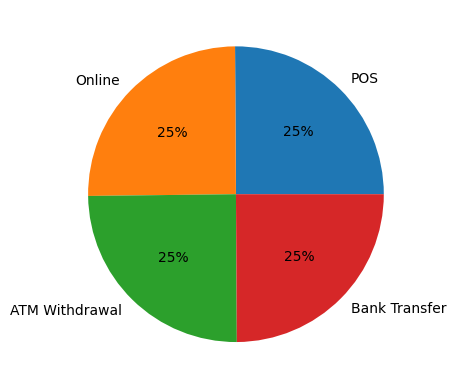

In [157]:
# pie chart representation
plt.pie(df1.values,labels=df1.index,autopct='%2.f%%')

In [158]:
df2=df['Device_Type'].value_counts()
df2

Device_Type
Tablet    16779
Mobile    16640
Laptop    16581
Name: count, dtype: int64

In [159]:
len(df['Device_Type'].unique())

3

([<matplotlib.patches.Wedge at 0x2b758ba8ee0>,
 [Text(0.5432625433858852, 0.9564861781300865, 'Tablet'),
  Text(-1.0999148760962303, -0.013684492764237312, 'Mobile'),
  Text(0.5551199287816354, -0.9496535498114416, 'Laptop')],
 [Text(0.2963250236650282, 0.5217197335255017, '34%'),
  Text(-0.5999535687797619, -0.007464268780493079, '33%'),
  Text(0.30279268842634655, -0.5179928453516953, '33%')])

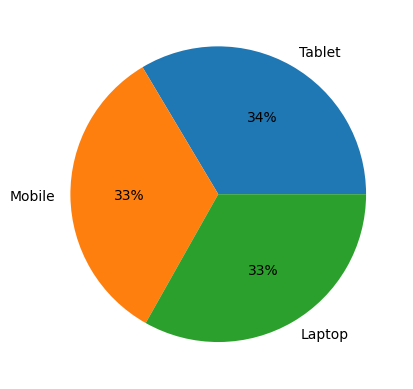

In [160]:
plt.pie(df2.values,labels=df2.index,autopct='%2.f%%')

In [161]:
df3=df['Location'].value_counts()
df3

Location
Tokyo       10208
Mumbai       9994
London       9945
Sydney       9938
New York     9915
Name: count, dtype: int64

In [162]:
len(df['Location'].unique())

5

([<matplotlib.patches.Wedge at 0x2b758bf4ac0>,
 [Text(0.88139296128276, 0.6581386235446203, 'Tokyo'),
  Text(-0.3667532995570908, 1.0370593123172787, 'Mumbai'),
  Text(-1.0997355347999929, -0.02411956670783532, 'London'),
  Text(-0.3246334286281783, -1.0510057740170191, 'Sydney'),
  Text(0.8933592635231349, -0.6418015474252164, 'New York')],
 [Text(0.4807597970633236, 0.358984703751611, '20%'),
  Text(-0.2000472543038677, 0.5656687158094247, '20%'),
  Text(-0.5998557462545415, -0.0131561272951829, '20%'),
  Text(-0.1770727792517336, -0.5732758767365559, '20%'),
  Text(0.4872868710126189, -0.35007357132284533, '20%')])

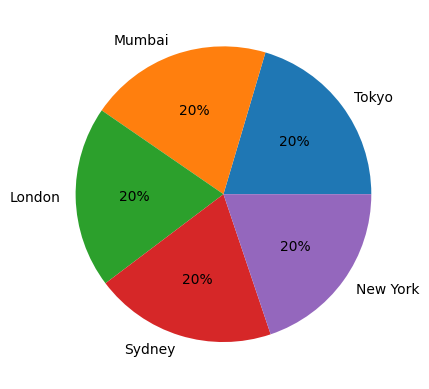

In [163]:
plt.pie(df3.values,labels=df3.index,autopct='%2.f%%')

In [164]:
df4=df['Merchant_Category'].value_counts()
df4

Merchant_Category
Clothing       10033
Groceries      10019
Travel         10015
Restaurants     9976
Electronics     9957
Name: count, dtype: int64

In [165]:
len(df['Merchant_Category'].unique())

5

([<matplotlib.patches.Wedge at 0x2b758da09a0>,
 [Text(0.888576141926292, 0.6484076187086226, 'Clothing'),
  Text(-0.3455011077453542, 1.0443318364134713, 'Groceries'),
  Text(-1.0999692510126746, -0.00822476909195572, 'Travel'),
  Text(-0.3326799375264984, -1.0484865565029269, 'Restaurants'),
  Text(0.8916622512168606, -0.6441571467855342, 'Electronics')],
 [Text(0.48467789559615915, 0.3536768829319759, '20%'),
  Text(-0.1884551496792841, 0.5696355471346206, '20%'),
  Text(-0.5999832278250952, -0.004486237686521302, '20%'),
  Text(-0.18146178410536273, -0.5719017580925055, '20%'),
  Text(0.48636122793646935, -0.35135844370120045, '20%')])

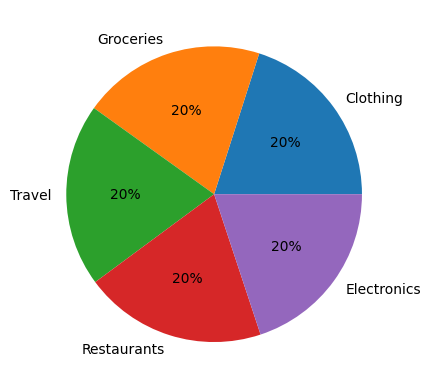

In [166]:
plt.pie(df4.values,labels=df4.index,autopct='%2.f%%')

In [167]:
df5=df['Card_Type'].value_counts()
df5

Card_Type
Mastercard    12693
Visa          12560
Amex          12419
Discover      12328
Name: count, dtype: int64

In [168]:
len(df['Card_Type'].unique())

4

([<matplotlib.patches.Wedge at 0x2b758dee3b0>,
 [Text(0.7683282295913662, 0.7871923091678407, 'Mastercard'),
  Text(-0.7993060076378911, 0.7557181393575093, 'Visa'),
  Text(-0.7567723429360775, -0.7983079737588997, 'Amex'),
  Text(0.7861776654273267, -0.7693664136048821, 'Discover')],
 [Text(0.41908812523165423, 0.4293776231824585, '25%'),
  Text(-0.43598509507521327, 0.41220989419500503, '25%'),
  Text(-0.41278491432876957, -0.4354407129593998, '25%'),
  Text(0.42882418114217813, -0.41965440742084476, '25%')])

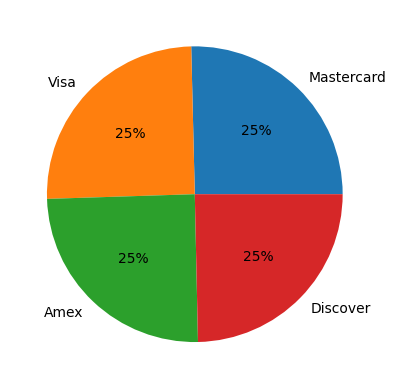

In [169]:
plt.pie(df5.values,labels=df5.index,autopct='%2.f%%')

In [170]:
df6=df['Authentication_Method'].value_counts()
df6

Authentication_Method
Biometric    12591
PIN          12586
Password     12457
OTP          12366
Name: count, dtype: int64

In [171]:
len(df['Authentication_Method'].unique())

4

([<matplotlib.patches.Wedge at 0x2b758e428c0>,
 [Text(0.7733574294471632, 0.7822520606037904, 'Biometric'),
  Text(-0.7908042608343056, 0.7646101104787378, 'PIN'),
  Text(-0.7624704414373247, -0.7928674705991989, 'Password'),
  Text(0.7843389137088786, -0.771240862793185, 'OTP')],
 [Text(0.4218313251529981, 0.42668294214752195, '25%'),
  Text(-0.43134777863689394, 0.4170600602611297, '25%'),
  Text(-0.4158929680567225, -0.4324731657813812, '25%'),
  Text(0.4278212256593883, -0.42067683425082814, '25%')])

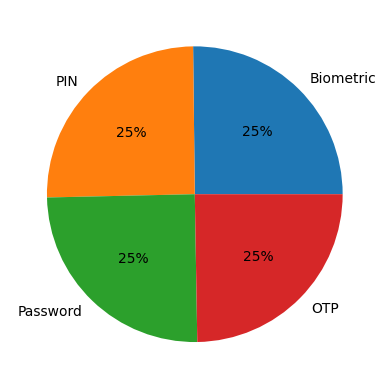

In [172]:
plt.pie(df6.values,labels=df6.index,autopct='%2.f%%')

In [173]:
# droping unwanted columns

In [174]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [175]:
df.drop(['Transaction_ID','User_ID','Timestamp','IP_Address_Flag','Transaction_Distance','Is_Weekend'],axis=1,inplace=True)
df

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0.0,7.0,437.63,3,Amex,65,Biometric,0.8494,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0.0,NaN,478.76,4,Mastercard,186,Password,0.0959,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0.0,14.0,50.01,4,Visa,226,Biometric,0.8400,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0.0,8.0,182.48,4,Visa,76,OTP,0.7935,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,1.0,14.0,328.69,4,Mastercard,140,Password,0.3819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0.0,2.0,389.00,3,Amex,98,PIN,0.1493,0
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0.0,13.0,434.95,4,Visa,93,Biometric,0.3653,1
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,1.0,1.0,369.15,2,Visa,114,Biometric,0.5195,0
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0.0,13.0,242.29,4,Discover,72,Biometric,0.7063,1


In [176]:
# filling missing values

In [177]:
df.isnull().sum()

Transaction_Amount                0
Transaction_Type                  0
Account_Balance                   0
Device_Type                       0
Location                          0
Merchant_Category                 0
Previous_Fraudulent_Activity     61
Daily_Transaction_Count         117
Avg_Transaction_Amount_7d         0
Failed_Transaction_Count_7d       0
Card_Type                         0
Card_Age                          0
Authentication_Method             0
Risk_Score                        0
Fraud_Label                       0
dtype: int64

In [178]:
df['Previous_Fraudulent_Activity'].unique()


array([ 0.,  1., nan])

In [179]:
df['Previous_Fraudulent_Activity']=df['Previous_Fraudulent_Activity'].fillna(df['Previous_Fraudulent_Activity'].mode()[0])

In [180]:
df['Daily_Transaction_Count'].unique()

array([ 7., nan, 14.,  8.,  3.,  2.,  6.,  4., 11.,  1., 13.,  9., 12.,
        5., 10.])

In [181]:
df['Daily_Transaction_Count']=df['Daily_Transaction_Count'].fillna(df['Daily_Transaction_Count'].mode()[0])

In [182]:
df.isnull().sum()

Transaction_Amount              0
Transaction_Type                0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Authentication_Method           0
Risk_Score                      0
Fraud_Label                     0
dtype: int64

In [183]:
# seperating input and output

In [184]:
# seperating x and y
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [185]:
x

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0.0,7.0,437.63,3,Amex,65,Biometric,0.8494
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0.0,3.0,478.76,4,Mastercard,186,Password,0.0959
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0.0,14.0,50.01,4,Visa,226,Biometric,0.8400
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0.0,8.0,182.48,4,Visa,76,OTP,0.7935
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,1.0,14.0,328.69,4,Mastercard,140,Password,0.3819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0.0,2.0,389.00,3,Amex,98,PIN,0.1493
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0.0,13.0,434.95,4,Visa,93,Biometric,0.3653
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,1.0,1.0,369.15,2,Visa,114,Biometric,0.5195
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0.0,13.0,242.29,4,Discover,72,Biometric,0.7063


In [186]:
y

0        0
1        1
2        1
3        1
4        1
        ..
49995    0
49996    1
49997    0
49998    1
49999    1
Name: Fraud_Label, Length: 50000, dtype: int64

In [187]:
df.dtypes

Transaction_Amount              float64
Transaction_Type                 object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
Previous_Fraudulent_Activity    float64
Daily_Transaction_Count         float64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Authentication_Method            object
Risk_Score                      float64
Fraud_Label                       int64
dtype: object

In [188]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
col=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Transaction_Type','Device_Type','Location','Merchant_Category','Card_Type','Authentication_Method']),remainder='passthrough')
x=col.fit_transform(x)
x

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 6.500e+01,
        8.494e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.000e+00, 1.860e+02,
        9.590e-02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 4.000e+00, 2.260e+02,
        8.400e-01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.140e+02,
        5.195e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.000e+00, 7.200e+01,
        7.063e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 1.540e+02,
        8.938e-01]], shape=(50000, 33))

In [189]:
x

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+00, 6.500e+01,
        8.494e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.000e+00, 1.860e+02,
        9.590e-02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 4.000e+00, 2.260e+02,
        8.400e-01],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.140e+02,
        5.195e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 4.000e+00, 7.200e+01,
        7.063e-01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 1.540e+02,
        8.938e-01]], shape=(50000, 33))

In [190]:
x.shape

(50000, 33)

In [191]:
x.dtype

dtype('float64')

In [192]:
# converting into training data and testing data


In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  0.    ,   1.    ,   0.    , ...,   0.    ,  77.    ,   0.4009],
       [  1.    ,   0.    ,   0.    , ...,   2.    ,  53.    ,   0.3106],
       [  0.    ,   0.    ,   1.    , ...,   3.    , 136.    ,   0.5135],
       ...,
       [  1.    ,   0.    ,   0.    , ...,   0.    , 210.    ,   0.7671],
       [  0.    ,   0.    ,   0.    , ...,   1.    , 213.    ,   0.958 ],
       [  1.    ,   0.    ,   0.    , ...,   1.    ,  90.    ,   0.8156]],
      shape=(35000, 33))

In [194]:
# model creation

In [195]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [196]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(15000,))

In [197]:
# perfomance evaluation methods 
#   1) accuracy score
#   2) recall
#   3) precision
#   4) F1_score

In [198]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10138,     0],
       [    0,  4862]])

In [199]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)*100
score

100.0

In [200]:
# to create classification report
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10138
           1       1.00      1.00      1.00      4862

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

